# Intermediate Machine Learning

First of all let me make it clear what I consider as Basic, Intermediate and Advanced Machine Learning and just to be clear I am not considering Deep learning as a part of machine learning in this case so advanced machine learning doesn't mean DEEP Learning.
<br>
This is very necessary to be able to diffrentiate the different levels of machine learning by content and by doing so you know what specifically you should know right now.

-----------------------------------

<font color="red" size=3>Please upvote this kernel if you like it. It motivates me to produce more quality content :)</font>

-----------------------------------

 * **Basic Machine Learning**
     * You know about the Pandas, Matplotlib, Numpy and could work with "*.csv" files
     * You know some basic imputing methods - SimpleImputer, KNNImputer
     * Use some common encodings such as LabelEncoding, OneHotEncoding
     * Know basic performance measure - Accuracy, confusion metric
     * You can use common algorithms to make models (no need to know inner workings)
         * Regression - Linear, Ridge, Lasso, SVM, Decision tree, RandomForest
         * Classification - Logistic, KNN, N.B., SVM, Decision tree, RandomForest
         * Unsupervised - Kmeans
         * Dimensionality Reduction - PCA
     * Could do basic Hyper-parameter tuning using - GridSearchCV and RandomSearchCV
     * As baseline you could get 70% accuracy on Titanic Kaggle Challenge

#### Best Method to complete Basic Machine Learning is to do a course. My recommendation - Applied Data Science in python specialisation (Coursera) first 3 courses.

-----------------------------

 * **Intermediate Machine Learning**
     * You know Pandas, Numpy, Matplotlib and some plotting libraries such as Plotly, Seaborn to make work faster
     * You could use SQLite, SQLAlchemy and such. and could work with other file types specially databases, not bounded by "*.csv"
     * You could use your own methods to impute the missing data
     * Encode data to the best of your understanding
     * Know about different Performace metrics - AUC, ROC, f1score (micro, macro), HammingLoss, precision, recall
     * Could handle imbalanced datasets
     * Could do multilabel predictive analysis
     * Start exploring new algorithms - xgboost, catboost, tsne etc. (still not must to know inner workings)
     * Could use other k-fold-techniques such as StratifiedKfold, hold-out-Kfold
     * **And could work upon text data using basic (no neural networks) nlp using pretrained embeddings at most**
     * You get to know about multiple online solutions and options such as Kaggle, Colab, AWS, towardsDataScience, Medium, etc.
     * You start Using Github for others approaches to different problems and use/contribute to open Source.
     * You start using original documentation for libraries and their workings ( its gold )
     
#### Best Method to complete Intermediate Machine Learning is by doing old Kaggle competitions and reading others notebooks and approaches. You can get a course but this time it won't be free for that quality.
  
------------------------------
     
 * **Advanced Machine Learning**
     * You are simple not bound in regards to Data
         * You strt collecting more data from various sources and mold them accoring to needs
     * You can use AutoML to speed up your work <br> <br>
     " When people asks why u need to know the inner working of algorithms the answer comes here well when making a model by ensambling multiple algorithms it becomes hard to know how to optimize things and how to make new/custom function for loss also by nowing which algorithm is working as well as why you will know what kind of chnages does the data need"<br> <br>
     * You can make ensambles of various algorithms and could make variations in algorithms for better results
     * You can make new features for ensambled models<br> <br>
     " By this time you have experience and know one the most important things that is how to map a real world problem to a Machine Learning Problem "<br> <br>
     * You can create a real world machine learning challenge
#### Best Method - **I don't know, I am not here yet**
     
-------------------------

### With all those things out of the way let's start the real work

------------

In [ ]:
from IPython.display import HTML
from IPython.lib.display import YouTubeVideo
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

##  1) Plotly

you should check out this tutorial by Pranav Anand - https://www.kaggle.com/pranavanand24/interactive-visualization-with-plotly-express <br>
As I said Original docs are gold - https://plotly.com/python/plotly-express/

## 2) Seaborn

Check this - https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

## 3) Sqlite and SQlAlchemy

In [ ]:
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/pd-0G0MigUA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

In [ ]:
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/YWFqtmGK0fk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

## 4) Imputing

You already know and use - mean imputing, mode imputing <br>
what you should/could do is a very simple trick - Create a model to predict the me missing value by using other columns so let's do that and I hope you will try to understand the usefulness of this method. To make thing real simple I will use the all known Titanic data.

In [ ]:
data = pd.read_csv("../input/titanic/train.csv")

In [ ]:
data.head(2)

In [ ]:
data.isna().sum()

In [ ]:
data.drop(columns = 'PassengerId', inplace=True)
# I will only use numerical values to make work short but you should do it using all options available
filtered_data = data[['Pclass', 'Fare', 'SibSp', 'Parch', 'Age']]

In [ ]:
train = filtered_data[filtered_data['Age'].notnull()]
test = filtered_data[filtered_data['Age'].isna()]

filtered_data.shape ,train.shape, test.shape

In [ ]:
linear_regressor = LinearRegression()

linear_regressor.fit(train.drop(columns = 'Age'), train['Age'])

test['Age'] = linear_regressor.predict(test.drop(columns = 'Age'))

In [ ]:
test.isna().sum()

We no longer have any mssing value in test data

###### You can use better algorithms but u get the basic idea on how to do it, now to tell u more let me show you one more thing.

In [ ]:
data['Cabin'].notnull().sum()

we Have 204 values of Cabin and let's see some values

In [ ]:
data['Cabin'][data['Cabin'].notnull()][:5]

You see some thing interesting ? <br>
no worries you will see it now

In [ ]:
floor = []
for i in data['Cabin']:
    
    try:
        value = list(i)[0]
        floor.append(value)
    except:
        floor.append(i)
        
data['floor'] = floor
print(data['floor'][data['floor'].notnull()][:5])

What we did was extracting the floor from the Cabin columns, so what happens from doing something so trivial ?

In [ ]:
print("Unique values in floor column: ", len(data['floor'].unique()))
print('Unique values in Cabin column: ', len(data['Cabin'].unique()))

well you can see we reduced our unique value to just 9 from 148 unique values and we get an option encode these and could also get relatively better results if we predict the missing values using these floor values as target. <br>

### I would request you to not go over the simplicity and neglect this, it's truly very useful, think about its practical implementation.

## 5) Encoding

Well this is something very easy and we have already partly done it
 * like we did in Cabin column instead of encoding something with lot's of unique values directly try to look for something that makes sense
 * If you have continuous values then try to divide them in bins
 * view your data and look for things to convert (in titanic dataset the columns "Name" has a 2 interesting things - Familyname and title so try to make new columns of them alone and see the results)
 
encoding doesn't only mean to convert to numeric data, it means to map some data to some other kind of data so think and use that.

In [ ]:
data.head(2)

**let's try to get the title from name**

In [ ]:
titles = []
for i in data['Name']:
    value = (i.split(',')[1]).split(' ')[1]
    titles.append(value)

In [ ]:
data['titles'] = titles
px.bar(data, x = 'titles', color='titles')

In [ ]:
for i in range(len(titles)):
    if titles[i] not in ['Mr.', 'Mrs.', 'Miss.', 'Master.']:
        titles[i] = 'other'

data['titles'] = titles

In [ ]:
px.bar(data, x = 'titles', color='titles', facet_col='Survived')

##### Similarly we can handle the family name and well. So you get the basic idea of what to do. Encodinng is not bound to always changing categorical to numerical it could also be categorical to categorical and so on. I request once again don't go over its simplicit.

## 6) Performance metric

This is necessary to know what should u change in either your dataset or in your model to get better results in the competition.
 * Study all common metrics
 * To improve yourself in this field study the data and the target and then try to come up with a performance metric by yourself and then compare it with the competition metric and now u know why it is this/that metric.

## 7) Imbalaned Data

You will get imbalaced data a lot of time and you need to know the tricks to handle imbalanced data efficiently and I will try to show you just that but first let's see what actually is imbalanced data.

In [ ]:
data = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')

In [ ]:
data.sample(2)

**Let's see the tistribution of out target columns**

In [ ]:
# Which values you would have to predict
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

values = list(data[cols_target].sum())
target = cols_target

other_rows = np.array(values).sum()

neutral_comment = data.shape[0] - other_rows

values.append(neutral_comment)
target.append('Total_rows')

ax = sns.barplot(target, values)
ax.set_xticklabels(target, rotation=45)
ax.set_title('Number of rows per type', fontsize=17)
ax.set_ylabel('Number of rows', fontsize=14)
ax.set_xlabel('Comment type', fontsize=14);

Well as you can see we have very few training samples for comments types other than neutral and if we don't take this into consideration we will get a bad model. Also you could get good accuracy if you predict if "Neutral" for all comments but that model isn't doing anything and is just garbage. So now let's head towards how to solve this.

In [ ]:
from sklearn.manifold import TSNE
import imblearn

TSNE is an algorithm that maps highdimensional data to lower dimesions (2D and 3D) and after doing that we could we could plot the 2D or 3D data to see if there is a structure in the data and if there is some structure we can use the imblearn library to generate/remove samples and much more.

you could also do oversampling and then check the results of training on newdataset distribusion and testing on test data distribution. <br>
Also Machine Learning is a iterative processes you will need to see what works for you for yourself by iterating over different settinngs.

TSNE vs PCA notebook - https://www.kaggle.com/vimary/tsne-vs-pca <br>
How to use TSNE efficiently - https://distill.pub/2016/misread-tsne/ <br>
How to use imblearn - https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

There is yet another very useful method while traing the model which is StratifiedKfold. <br>
We used other methods for corss validation in basic machine learning and saw that Kfold is a very important aspect of our evaluation of model

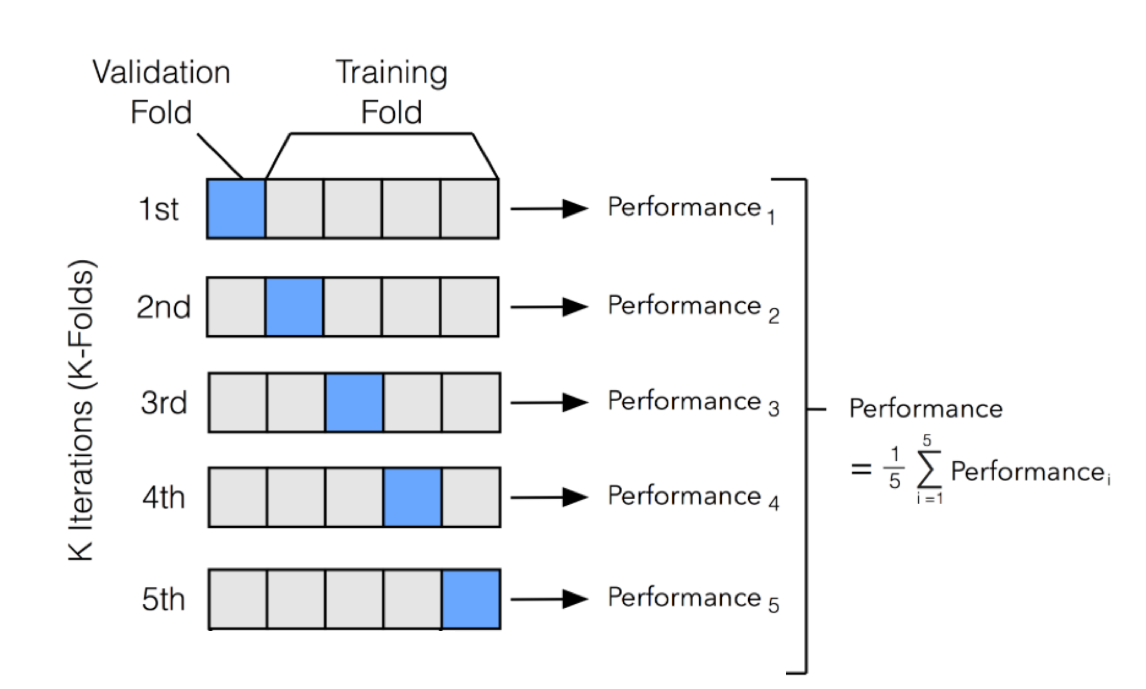

Well the problem is that the basic Kfold could use any segmented data section for training and validation and hence in case of a skewed/imbalanced data the distribustion of data for training and validation may not remain constant and we could get biased/fake results and to overcome that we use StratifiedKfold which divided each fold in same distribution as that of the original training data.

In [ ]:
from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=10)

In [ ]:
for fold, (train, validation) in enumerate(k_fold.split(X=data, y=data.toxic.values)):
    data.loc[validation, 'kfold'] = fold

And now we will use this new data instead of the previous normal k-fold. I would recomment that you always use stratified-k-fold in compare to normal k-fold.

## 8) Multilabel Classification

A lot of time it happens that you have to predict say top x possible outcome from a set of outcomes of length y. This is a kind of multilabel problem also in a case u might have to predicte the presence of various labels at the smae time and that is again a multilabel classification problem. <br>
example - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge <br>
also - https://www.kaggle.com/c/youtube8m

A must read - https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff <br>
focus on part-5 Multi-Label-Classification_techniques.

After reading the above article you will see that it's not possible to optimize your model using some RandomSearchCV or something else if you use inbuilt modules for chainclassifier and etc. from skmultilearn.

In [ ]:
from skmultilearn.problem_transform import ClassifierChain, BinaryRelevance
clf_chain = ClassifierChain()
bin_rel = BinaryRelevance()

I recently had to deal with multilabel data and had the same problem and to overcome this I made a fairly simple funtion for chain classification and you should also be able to create your own functions and classes.

In [ ]:
def chain_classifier(model, x_train, y_train, x_validation=None, y_validation=None, 
                     x_test=None, y_test=None, validate=False, test=False, display=False, tune=False, param=None):

    print('Model = ', model, '\n')
    train_scores = []
    validation_scores = []
    test_scores = []
    model_details = []
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score, f1_score
    
    for label in cols_target:

        print('... Processing {} \n'.format(label))
        
        y_train_label = y_train[label]
        y_validation_label = y_validation[label]
        y_test_label = y_test[label]
        
        # To tune the model
        if tune:
            model = RandomizedSearchCV(model, param, n_jobs=-1, cv=10)
        
        # train the model using x_train & y_train
        model.fit(x_train,y_train_label)
        
        # compute the training results
        y_train_pred = model.predict(x_train)
        
        if display:
            print('Training Accuracy is {}'.format(accuracy_score(y_train_label, y_train_pred)))
            print('Training F1Score is {} \n'.format(f1_score(y_train_label, y_train_pred)))
        
        # Append scores
        to_append = (accuracy_score(y_train_label, y_train_pred), f1_score(y_train_label, y_train_pred))
        train_scores.append(to_append)
        
        # Adding predictions as features
        x_train = add_feature(x_train, y_train_pred)
        
        if validate:
            # compute validation results
            y_validation_pred = model.predict(x_validation)
            
            if display:
                print('Validation Accuracy is {}'.format(accuracy_score(y_validation_label, y_validation_pred)))
                print('Validation F1Score is {} \n'.format(f1_score(y_validation_label, y_validation_pred)))
            
            # Adding prediction as feature
            x_validation = add_feature(x_validation, y_validation_pred)
            
            
            # Append scores
            to_append = (accuracy_score(y_validation_label, y_validation_pred), f1_score(y_validation_label, y_validation_pred))
            validation_scores.append(to_append)

        if test:
            # compute test results
            y_test_pred = model.predict(x_test)
            
            if display:
                print('Test Accuracy is {}'.format(accuracy_score(y_test_label, y_test_pred)))
                print('Test F1Score is {} \n'.format(f1_score(y_test_label, y_test_pred)))
            
            # append Scores
            to_append = (accuracy_score(y_test_label, y_test_pred), f1_score(y_test_label, y_test_pred))
            test_scores.append(to_append)
            
            # Adding prediction as feature
            x_test = add_feature(x_test, y_test_pred)
        
        model_details.append(model)
        
        
    scores = (train_scores, validation_scores, test_scores)    
        
    return scores, model_details

## 9) Basic NLP 

For this I would recommend these notebooks  and you should explore similar title without deep learning<br>
 * https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners
 * https://www.kaggle.com/sudalairajkumar/a-look-at-different-embeddings
 
also study some regular expression and if possible do the **Applied Data Science with python specialisation course-4 on Coursera.**

----------------------------------------

## Must Must Must do relevant competitions

# Some tips

 * While using large files after feature engineering you might run out of RAM so always export your data at different levels and import data with dtype as np.float16 as always your data is smallet than than.
 * Try to get other open sourse data for competitions
 * To get better at writing notebooks this might come in handy - https://github.com/Abhishek-Prajapat/Cheat-Sheets-collected-/blob/master/markdown-cheatsheet-online.pdf
 * If you have a GPU VRAM >= 6GB install Ubuntu(18.04) and Rapids (https://rapids.ai/start.html) and start using gpu as it really really help in iterating model cycle faster.
 * Use automl and such libraries (Pycaret) if possible to reduce time.

<font color="red" size=3>Please upvote this kernel if you like it. It motivates me to produce more quality content :)</font>